# Andrew Cerqueira Martins

You can find me on the following platforms:
- [LinkedIn](https://www.linkedin.com/in/andrewcerqueira/)
- [GitHub](https://github.com/Andy-Martins)
- [Instagram](https://www.instagram.com/andy.martins/)

# Comparison of Regression Models with Test Data

In this notebook, we will train three regression models using the "California Housing" dataset, make predictions with these models on a test dataset, and compare the results with the actual values.

### **1. Import Libraries and Data**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

from sklearn.datasets import fetch_california_housing # Dataset used for training

### **2. Load and Prepare Data**

We will load the California Housing dataset, split the data into training and testing sets, and normalize the data.


In [ ]:
# Load the California Housing dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### **3. Train the Models**

We will train three regression models: Linear Regression, SVR, and Decision Tree Regressor.


In [ ]:
# Initialize and train the Linear Regression model
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

# Initialize and train the SVR model
svr = SVR(kernel='rbf')  # Using radial basis function kernel
svr.fit(X_train_scaled, y_train)

# Initialize and train the Decision Tree Regressor model
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train_scaled, y_train)


DecisionTreeRegressor(random_state=42)

### **4. Evaluate the Models with Test Data**

We will make predictions with the test set and evaluate the performance of the models.


In [ ]:
# Make predictions using the test data
y_pred_linear = linear.predict(X_test_scaled)
y_pred_svr = svr.predict(X_test_scaled)
y_pred_tree = tree.predict(X_test_scaled)

# Evaluate the performance of the models with the test data
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Create a DataFrame with model metrics
metrics = {
    'LR': [mse_linear, r2_linear],
    'SVR': [mse_svr, r2_svr],
    'DT': [mse_tree, r2_tree]
}

# Create a DataFrame with metrics as rows
df_metrics = pd.DataFrame(metrics, index=['MSE', 'R²'])

# Display the DataFrame
print(df_metrics)

           LR       SVR        DT
MSE  0.555892  0.357003  0.493969
R²   0.575788  0.727564  0.623042


### **5. Compare Results**

We will visualize the model results using plots.


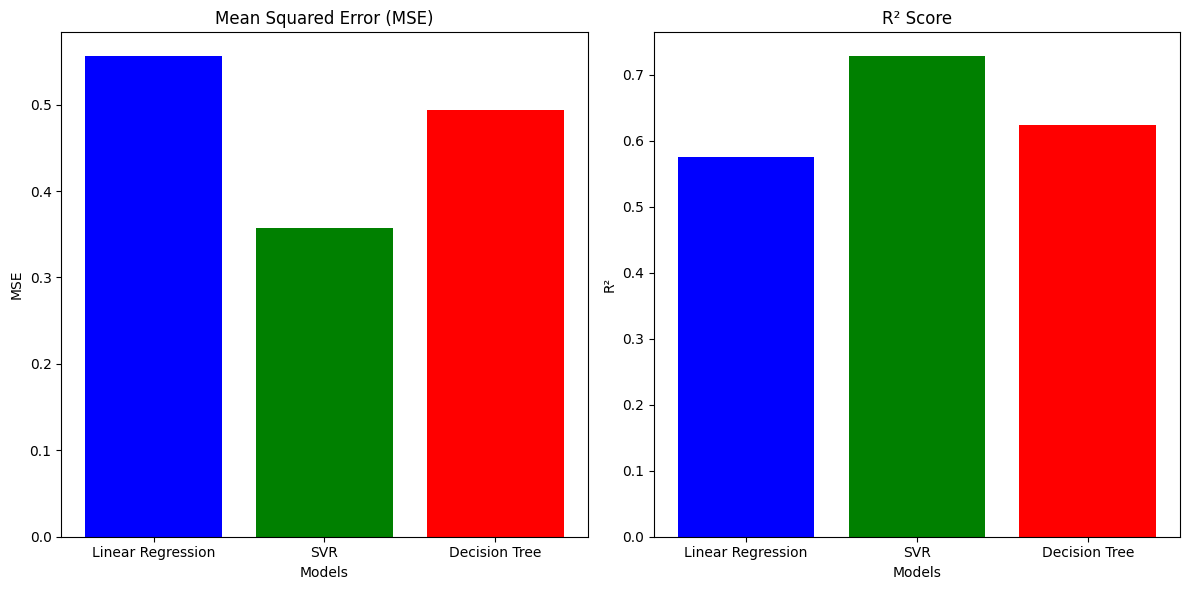

In [ ]:
# Compare Results
models = ['Linear Regression', 'SVR', 'Decision Tree']
mse_values = [mse_linear, mse_svr, mse_tree]
r2_values = [r2_linear, r2_svr, r2_tree]

plt.figure(figsize=(12, 6))

# MSE Plot
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color=['blue', 'green', 'red'])
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Models')
plt.ylabel('MSE')

# R² Plot
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['blue', 'green', 'red'])
plt.title('R² Score')
plt.xlabel('Models')
plt.ylabel('R²')

plt.tight_layout()
plt.show()


### **6. Prediction and Comparison with Selected Samples**

We will select a set of samples from the test set and compare the predictions of the Linear Regression, SVR, and Decision Tree models with the actual values of these samples. We will display the predictions and actual values in a DataFrame and also visualize them graphically to assess the accuracy of each model across the selected samples.


In [ ]:
# Define the indices for all test samples and obtain the true values and model predictions
indices = range(len(y_test))

# Define the number of points to be displayed in the plots
num_points = 50
sample_indices = np.arange(num_points)

# Obtain the true values and model predictions for the selected indices
y_real_sample = np.array(y_test)[sample_indices]
y_pred_linear_sample = np.array(y_pred_linear)[sample_indices]
y_pred_svr_sample = np.array(y_pred_svr)[sample_indices]
y_pred_tree_sample = np.array(y_pred_tree)[sample_indices]

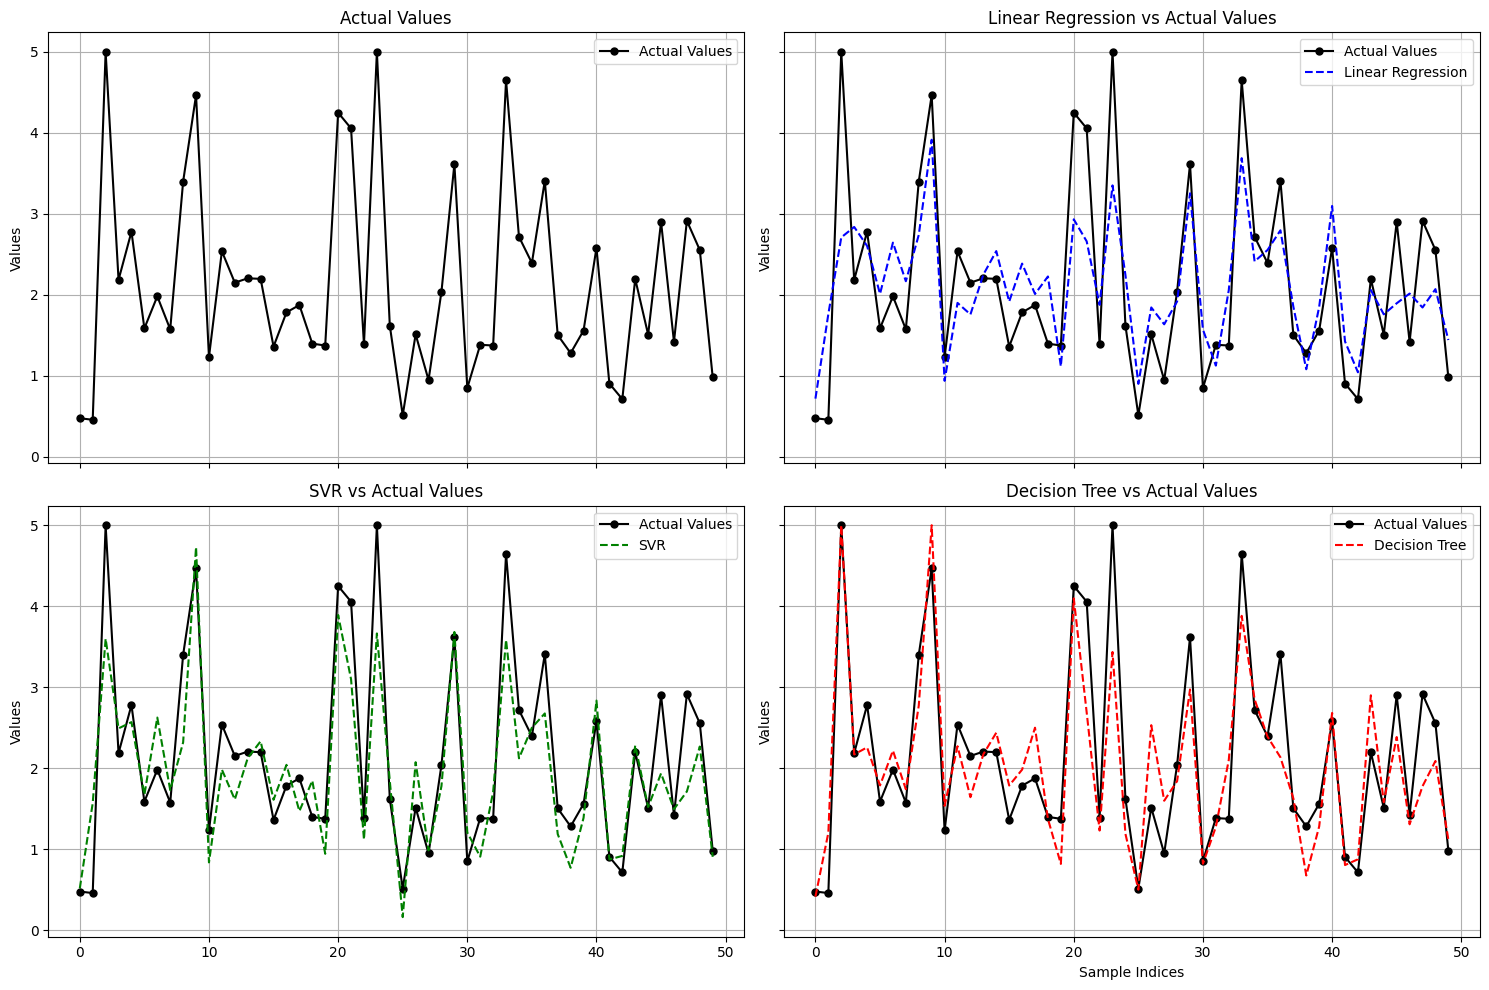

In [ ]:
# Create the figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Plot for Actual Values
axs[0, 0].plot(sample_indices, y_real_sample, 'k-o', label='Actual Values', markersize=5)
axs[0, 0].set_title('Actual Values')
axs[0, 0].set_ylabel('Values')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot for Linear Regression vs Actual Values
axs[0, 1].plot(sample_indices, y_real_sample, 'k-o', label='Actual Values', markersize=5)
axs[0, 1].plot(sample_indices, y_pred_linear_sample, 'b--', label='Linear Regression')
axs[0, 1].set_title('Linear Regression vs Actual Values')
axs[0, 1].set_ylabel('Values')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot for SVR vs Actual Values
axs[1, 0].plot(sample_indices, y_real_sample, 'k-o', label='Actual Values', markersize=5)
axs[1, 0].plot(sample_indices, y_pred_svr_sample, 'g--', label='SVR')
axs[1, 0].set_title('SVR vs Actual Values')
axs[1, 0].set_ylabel('Values')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot for Decision Tree vs Actual Values
axs[1, 1].plot(sample_indices, y_real_sample, 'k-o', label='Actual Values', markersize=5)
axs[1, 1].plot(sample_indices, y_pred_tree_sample, 'r--', label='Decision Tree')
axs[1, 1].set_title('Decision Tree vs Actual Values')
axs[1, 1].set_xlabel('Sample Indices')
axs[1, 1].set_ylabel('Values')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()
